# Homework 1 for Security Analytics 
## Author: Kandarp Khandwala - kkhandw1
---
### Obama vs Romney Dataset

- Install Python, Jupyter notebook, and necessary libraries like Numpy, Pandas, sklearn, matplotlib, seaborn, etc.
- Download the Obama and Romney poll data as used in the class, and complete following tasks:
    * Use the same URL link to the .csv file to download data
    * Describe the “Romney” data using the describe function
    * Find out pollster(s) on which Romney receive the most and the least votes
    * Draw a time series graph that shows the total number of Romney’s votes along with pollster start date
    * Submit your homework in an .ipynb file

- Homework due before next class (submit by 6:00PM ET, Monday, 9/10/2018)</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests
from io import StringIO
import seaborn as sns

# Task 1: Download and display data

In [2]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [3]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


# Task 2: Describe Romney Data

In [4]:
poll_df['Romney'].describe()

count    586.000000
mean      44.614334
std        2.906180
min       32.000000
25%       43.000000
50%       45.000000
75%       46.750000
max       53.000000
Name: Romney, dtype: float64

### Find out actual observations

In [5]:
poll_df.dropna(subset=['Number of Observations'], inplace=True)
poll_df['RomneyObservations'] = poll_df['Number of Observations'] * poll_df['Romney'] / 100
poll_df[['Start Date', 'Pollster', 'Romney', 'Number of Observations', 'RomneyObservations']].sort_values(['RomneyObservations'])

,Start Date,Pollster,Romney,Number of Observations,RomneyObservations
452,2011-11-13,FOX,44.0,328.0,144.32
531,2011-05-02,Newsweek/Daily Beast,36.0,600.0,216.00
538,2011-04-07,PPP (D),41.0,532.0,218.12
581,2009-07-15,PPP (D),40.0,577.0,230.80
518,2011-06-09,PPP (D),45.0,520.0,234.00
577,2009-09-21,PPP (D),39.0,621.0,242.19
543,2011-02-11,PPP (D),41.0,600.0,246.00
524,2011-05-23,PPP (D),42.0,600.0,252.00
558,2010-09-10,PPP (D),43.0,590.0,253.70
560,2010-08-06,PPP (D),42.0,606.0,254.52


# Task 3a: Find out the max votes for Romney by Pollster

In [6]:
poll_df[['Pollster', 'RomneyObservations']].loc[poll_df['RomneyObservations'].idxmax()]

Pollster               YouGov
RomneyObservations    17141.8
Name: 18, dtype: object

In [7]:
poll_df[['Pollster', 'RomneyObservations']].groupby('Pollster').sum().sort_values(['RomneyObservations']).reset_index().iloc[-1] # grouped by Pollster

Pollster              Rasmussen
RomneyObservations        71627
Name: 60, dtype: object

# Task 3b: Find out the min votes for Romney by Pollster

In [8]:
poll_df[['Pollster', 'RomneyObservations']].loc[poll_df['RomneyObservations'].idxmin()]

Pollster                 FOX
RomneyObservations    144.32
Name: 452, dtype: object

In [9]:
poll_df[['Pollster', 'RomneyObservations']].groupby('Pollster').sum().sort_values(['RomneyObservations']).reset_index().iloc[0] # grouped by Pollster

Pollster              Esquire/Yahoo! News
RomneyObservations                 333.04
Name: 0, dtype: object

# Task 4: Time Series of Romney Votes vs Start Date

In [10]:
grouped_df = poll_df.groupby(['Start Date']).sum().reset_index()

In [11]:
grouped_df[['Start Date', 'RomneyObservations']]

,Start Date,RomneyObservations
0,2009-03-13,617.32
1,2009-04-17,267.54
2,2009-05-14,350.00
3,2009-06-12,255.20
4,2009-07-15,230.80
5,2009-07-18,450.00
6,2009-08-14,744.74
7,2009-09-21,242.19
8,2009-10-16,306.40
9,2009-11-13,458.38


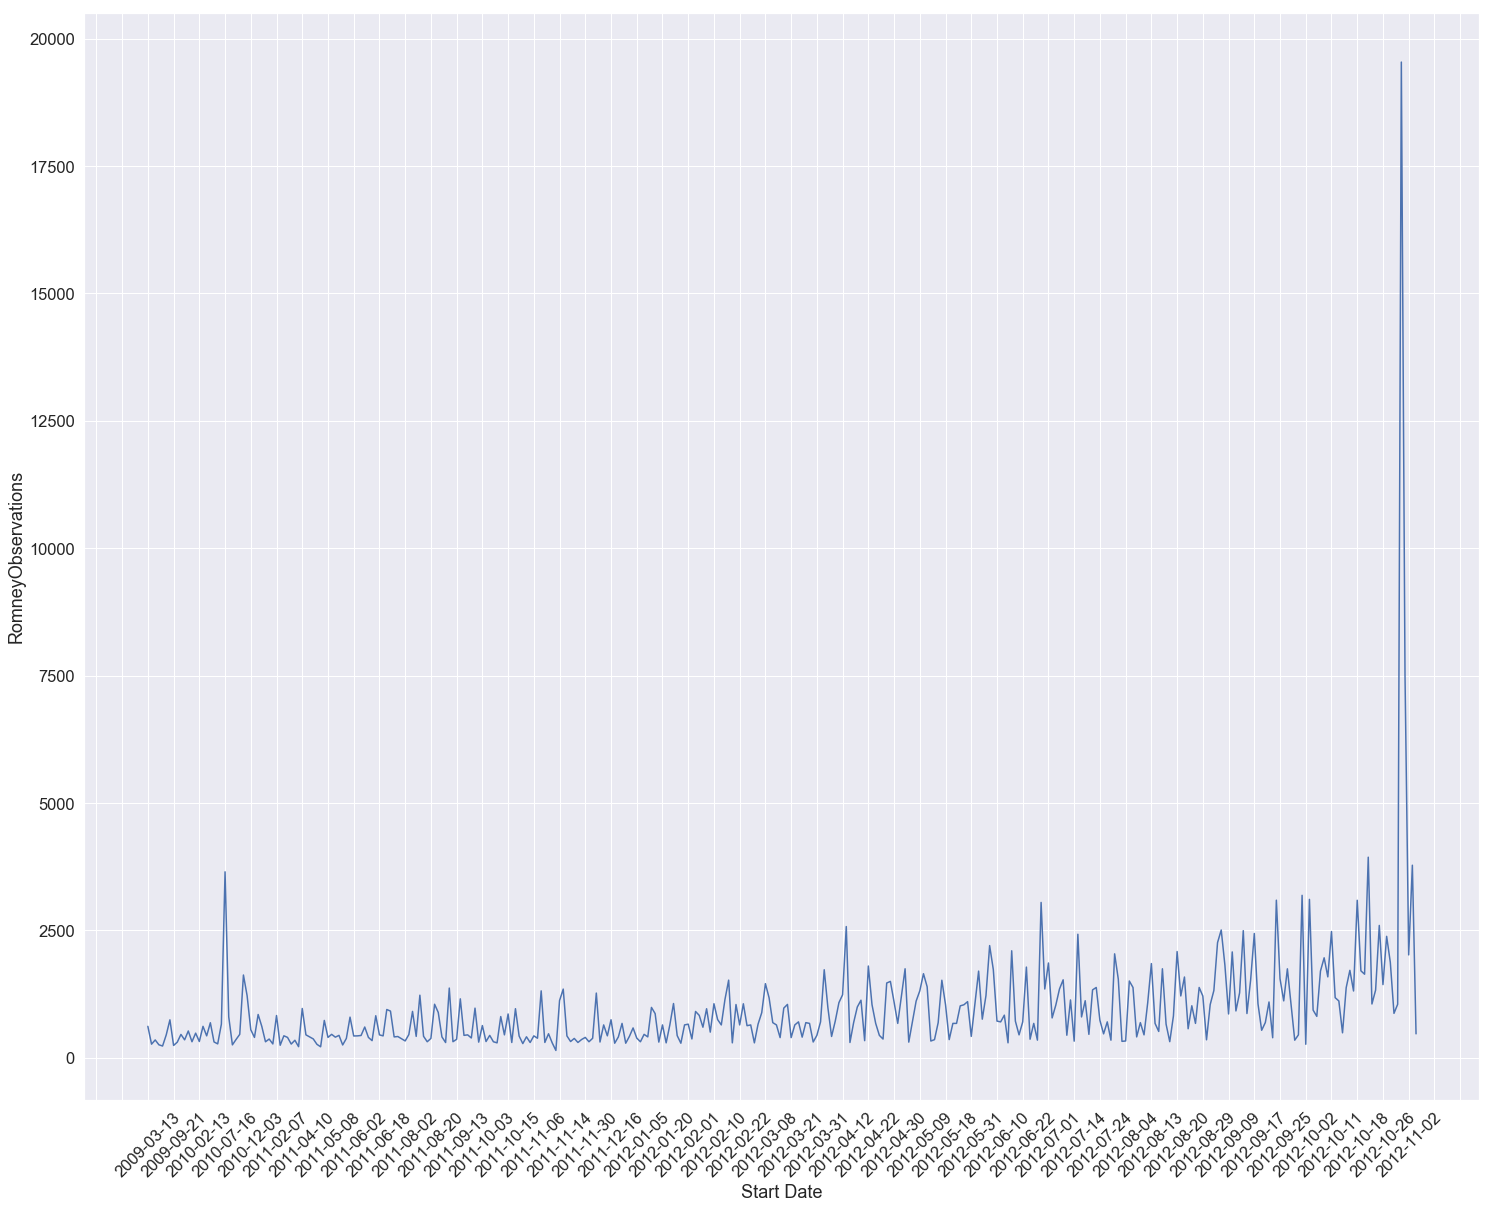

In [12]:
sns.set(font_scale=1.5, rc={'figure.figsize':(25,20)})
lp = sns.lineplot(x='Start Date',
                  y='RomneyObservations',
                  data=grouped_df)
lp.xaxis.set_major_locator(ticker.MultipleLocator(base=7))
plt.xticks(rotation=45)
plt.show()
